In [12]:
import os
import re
import chardet

# 文件批处理
def FileReader(tag):
    # print(os.getcwd())
    path = r'./data/htl_del_4000/' + tag 
    os.listdir(path)
    FileList = []
    for iter in os.listdir(path):
        if os.path.splitext(iter)[1] == '.txt':
            FileList.append(iter)
    return FileList

# 文件转码
def ReWrite(FileList,tag):
    path = r'./data/htl_del_4000/' + tag + r'/'
    for iter in range(0,len(FileList)):
        row = ''
        cur_path = path + FileList[iter]
        # print (cur_path)
        with open(cur_path,'r',encoding='gbk',errors = 'ignore') as f:
            row = f.read()
            # row.decode('utf-8')
            # print(row)
        with open(cur_path,'w',encoding='utf-8') as W:
            W.write(row)

# FileList = FileReader('pos')
# ReWrite(FileList,'pos')



In [13]:
# 对语料进行分词，去除停用词
import jieba
import json
import re
def _PreProcess(centence):
    centence = re.sub('\\s','',centence)
    centence = re.sub('[a-z,A-Z]*','',centence)
    
    row_list =  jieba.lcut(centence,cut_all = False)
    # print(row_list)
    return StripWord(row_list)
def StripWord(text):
    stop = open(r'./data/cn_stopwords.txt', 'r+', encoding='utf-8')
    
    tmp = stop.readlines()
    tmp = ''.join(tmp)
    stopWord = tmp.split("\n")
    # print(stopWord[:100])
    ans = []
    for iter in text:
        if not iter in stopWord:
            # print(iter)
            ans.append(iter)
    return ans
def PreProcess(path):
    text = ''
    # print(path)
    with open(path,'r',encoding = 'utf-8') as txt:
        text = txt.readline()
    # print(text[:20])
    return _PreProcess(text)


def File_Dic(FileList,tag):
    path = r'./data/htl_del_4000/' + tag + r'/'
    dic = {}
    for iter in range(0,len(FileList)):
        cur_path = path + FileList[iter]
        dic[iter] = PreProcess(cur_path)
        # print(dic[iter])
    return dic


def row_split(tag):
    FileList = FileReader(tag)
    ReWrite(FileList,tag)
    volc = File_Dic(FileList,tag)
    # print(len(FileList))
    j_data = json.dumps(volc,ensure_ascii=False)
    with open(r'./row_语料分词_' + tag + '.json' ,'w',encoding='utf-8') as f:
        f.write(j_data)

row_split('pos')
row_split('neg')

In [14]:
# 构建词表
def vocabulary(path):
    vocab = {}
    ans = {}
    with open(path,'r',encoding='utf-8') as f:
        vocab = json.load(f)

    for iter in vocab.keys():
        ans = set(ans)|set(vocab[iter])
    return ans

def Construct_vocabu(Path,tag):
    vocab = vocabulary(Path)
    with open(r'词表_'+tag,'w',encoding = 'utf-8') as f:
        for iter in vocab:
            f.write(iter + '\n')

Construct_vocabu(r'./row_语料分词_neg.json','neg')
Construct_vocabu(r'./row_语料分词_pos.json','pos')


In [15]:
# 总词表
def merge_vocab(Path_pos,Path_neg):
    pos = []
    neg = []
    with open(Path_pos,'r',encoding='utf-8') as f:
        pos = f.read().split('\n')
    with open(Path_neg,'r',encoding='utf-8') as f:
        neg = f.read().split('\n')
    return set(pos)|set(neg)

Merged_vocab = merge_vocab(r'./词表_pos',r'./词表_neg')

with open(r'./词表_Merged','w',encoding='utf-8') as f:
    for iter in Merged_vocab:
        f.write(iter + '\n')


In [16]:
# 统计文档频率
import json
def _Frequency(File_vocab,tag_vocab):
    dic = {}
    for iter in tag_vocab:
        count = 0
        for f in File_vocab.values():
            if iter in f:
                count += 1
        dic[iter] = count
    return dic
def Frequency(File_Vocab_Path,Tag_Vocab_Path,tag):
    File_vocab = {}
    tag_vocab = []
    with open(File_Vocab_Path,'r',encoding='utf-8') as f:
        print()
        File_vocab = json.load(f)
    with open(Tag_Vocab_Path,'r',encoding='utf-8') as f:
        tag_vocab = f.read()
        tag_vocab = tag_vocab.split('\n')
    
    dic = _Frequency(File_vocab,tag_vocab)
    j_data = json.dumps(dic,ensure_ascii=False)
    with open(r'./文档频率统计_' + tag + '.json','w',encoding = 'utf-8') as f:
        f.write(j_data)
    return
def cal_Frequency(tag):
    # print(r'./row_语料分词_'+tag +'.json')
    Frequency(r'./row_语料分词_'+tag +'.json',r'./词表_Merged',tag)

# dic1 = {'0':'[a,b,c]','1':'[d]'}
# l = ['a','b','c']
# ans = _Frequency(dic1,l)
# print(type(ans))

cal_Frequency('pos')
cal_Frequency('neg')
   

In [17]:
def merge_Frequenc(Path_pos,Path_neg):
    pos = {}
    neg = {}
    with open(Path_pos,'r',encoding = 'utf-8') as f:
        pos = json.load(f)
    with open(Path_neg,'r',encoding = 'utf-8') as f:
        neg = json.load(f)
    for iter in pos.keys():
        neg[iter] += pos[iter]
    return neg

Merged_Frequ = merge_Frequenc(r'./文档频率统计_pos.json',r'./文档频率统计_neg.json')

with open('./文档频率统计_merged.json','w',encoding = 'utf-8') as f:
    tmp = json.dumps(Merged_Frequ,ensure_ascii=False)
    f.write(tmp)

In [18]:
# from collections import Counter
# d = {'饿哦':1,'我的':2,'c':4}
# p = {'饿哦':1,'我的':2,'c':4}

# for iter in p.keys():
#     d[iter] += p[iter]

# print(d)

[3304 3310 3313 3318 3323 3325 3331 3333 3333 3338 3352 3353 3361 3364
 3367 3379 3381 3383 3385 3391 3391 3399 3402 3424 3446 3451 3466 3495
 3497 3514 3514 3515 3524 3544 3561 3632 3639 3684 3686 3690 3694 3741
 3767 3791 3834 3837 3849 3927 3930 3969]
(6411,)


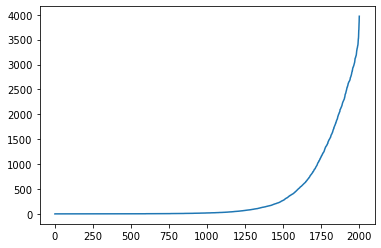

3969
0
6411


In [19]:
# 使用文档频率计算特征得分
# 归一化看一下频率分布
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
def _Frequency_distribute(freq):
    
    xpoints = np.arange(0,2000,2000/len(freq))
    # print(np.shape(xpoints))
    ypoints = np.array(freq)
    print(np.shape(ypoints))

    plt.plot(xpoints, ypoints)
    plt.show()

def Frequency_distribute(Path):
    data = {}
    with open(Path,'r',encoding='utf-8') as f:
        data = json.load(f)
    data_list = np.array(list(data.values()))
    data_list.sort()

    Max = data_list[-1]
    Min = data_list[0]
    print(data_list[-50:])
    # Data_list = []
    # for iter in data_list:
    #     Data_list.append(float((iter - Min))/float((Max - Min)))
    
    _Frequency_distribute(data_list)
    return Max,Min,len(data_list)

Max,Min,Len = Frequency_distribute(r'./文档频率统计_merged.json')
print (Max)
print (Min)
print (Len)

In [20]:
# 根据上面的分析设置阈值为 6-160
# import json
def _DF_result(Path):
    data = {}
    with open(Path,'r',encoding='utf-8') as f:
        data = json.load(f)
    ans = [k for k,v in data.items() if v > 6 and v < 170] 
    return ans

def DF_result():
    data = _DF_result(r'./文档频率统计_merged.json')
    path = r'./DF_特征词表'
    with open (path,'w',encoding='utf-8') as f:
        for iter in data:
            # 去除单字词
            if(len(iter) > 1):
                f.write(iter + '\n')

DF_result()

In [21]:
#基于互信息
# 计算一些统计量
# import json
import math
neg_row = {}
with open(r'./row_语料分词_neg.json','r',encoding = 'utf-8') as f:
    neg_row = json.load(f)

pos_row = {}
with open(r'./row_语料分词_pos.json','r',encoding = 'utf-8') as f:
    pos_row = json.load(f)

file_num_neg = len(neg_row)
file_num_pos = len(pos_row)

merged = {}
with open(r'./文档频率统计_merged.json','r',encoding = 'utf-8') as f:
    merged = json.load(f)

pos = {}
with open(r'./文档频率统计_pos.json','r',encoding = 'utf-8') as f:
    pos = json.load(f)

neg = {}
with open(r'./文档频率统计_neg.json','r',encoding = 'utf-8') as f:
    neg = json.load(f)

def cal_MI(A,B,C,N):
    if(A*N == 0):
        return 0
    return math.log(float(A*N)/float((A+C))*(A+B))

def pos_MI():
    mi = {}
    for iter in pos.keys():
        mi[iter] = cal_MI(pos[iter],neg[iter],file_num_pos - pos[iter],file_num_neg + file_num_pos)
    
    return mi
# pos MI
def pos_MI():
    mi = {}
    for iter in pos.keys():
        mi[iter] = cal_MI(pos[iter],neg[iter],file_num_pos - pos[iter],file_num_neg + file_num_pos)
    
    return mi
# neg_MI
def neg_MI():
    mi = {}
    for iter in neg.keys():
        mi[iter] = cal_MI(neg[iter],pos[iter],file_num_neg - neg[iter],file_num_neg + file_num_pos)
    
    return mi

pos_mi = pos_MI()
neg_mi = neg_MI()


In [22]:
# 取均值
with open(r'./互信息_均值_score','w',encoding='utf-8') as f:
    dic = {}
    for iter in pos_mi.keys():
        dic[iter] = '%.4f'%((pos_mi[iter] + neg_mi[iter])/2)
    ord = dict(sorted(dic.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))
    data = list(ord.keys())[:1000]
    # jdata = json.dumps(dic,ensure_ascii=False)
    for iter in data:
        f.write(iter + '\n')

In [23]:
# 加权
with open(r'./互信息_概率加权_score','w',encoding='utf-8') as f:
    dic = {}
    for iter in pos_mi.keys():
        dic[iter] = '%.4f'%((pos[iter] * pos_mi[iter] + neg[iter] * neg_mi[iter]) /(file_num_pos + file_num_neg))
    
    ord = dict(sorted(dic.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))
    data = list(ord.keys())[:1000]
    # jdata = json.dumps(dic,ensure_ascii=False)
    for iter in data:
        f.write(iter + '\n')

In [24]:
# 基于信息增益
file_num_merge = file_num_pos +  file_num_neg
def _entropy(A,B):
    if B < 1e-6 and A < 1e-6:
        return 0
    if A < 1e-6:
        return 0
    if B < 1e-6:
        return 20000
    return float(A)/B * math.log(float(A)/B)
def entropy(A):
    return A* math.log(A)

base1 = -1 * (_entropy( file_num_pos,file_num_merge) + _entropy(file_num_neg,file_num_merge))
def IG(iter):
    base2 = float(merged[iter])/file_num_merge * (_entropy(pos[iter],merged[iter]) + _entropy(neg[iter],merged[iter]))
    base3 = (1-float(merged[iter])/file_num_merge) * (entropy(file_num_pos - pos[iter]) + entropy(file_num_pos - neg[iter]))
    return base1 + base2 + base3

def Mutual_info():
    dic = {}
    for iter in merged.keys():
        if len(iter) > 1:
            dic[iter] = '%.4f'%IG(iter)
    
    return dic

with open(r'./互信息_信息增益_score','w',encoding='utf-8') as f:
    
    dic = Mutual_info()
    ord = dict(sorted(dic.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))
    data = list(ord.keys())
    for iter in data:
        f.write(iter + '\n')

In [25]:
# dic = {'a':2,'n':0,'c':10}
# ord = dict(sorted(dic.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))
# data = list(ord.keys())
# print(ord)
# print(data)